# **PhD430 - Machine Learning Exam**
## Morteza Aghajanzadeh 
### Dec 2023

In [35]:
import random

## **Task 1**

### (a) *Symbolic differentiation*

\begin{equation*}
\begin{split}
L & = (y - \omega x -b)^2\\
\frac{\partial L}{\partial \omega} &  = 2 (-x)(y - \omega x -b)\\
& = 2 (-2)(3 - 2 \omega ) \\
& = 8 \omega - 12
\end{split}
\end{equation*}


### (b) *The forward difference method*

\begin{equation*}
\begin{split}
L & = (y - \omega x -b)^2\\
\frac{\partial L}{\partial \omega} &  \approx  \dfrac{(y - (\omega + h) x -b)^2 - (y - \omega x -b)^2}{h}\\
& \approx \dfrac{((y - (\omega + h) x -b) + (y - \omega x -b)) ((y - (\omega + h) x -b) - (y - \omega x -b))}{h} \\
& \approx \dfrac{(2(y - \omega x -b) - hx) (-hx)}{h} \\
& \approx {(2(y - \omega x -b) - hx) (-x)}\\
& \approx {2(-x) (y - \omega x -b)}\\
& \approx 2 (-2)(3 - 2 \omega ) \\
& = 8 \omega - 12
\end{split}
\end{equation*}


### (c) *Autodifferentiation*

\begin{equation*}

\left.\begin{array}{c}
g(z) = z^2 \Rightarrow \frac{\partial g(z)}{\partial z} = 2z\\
f(w) = y - wx - b \Rightarrow \frac{\partial f(w)}{\partial w} = -x
\end{array}\right\} \Rightarrow \frac{\partial L}{\partial \omega} = \frac{\partial g(f(w))}{\partial f(w)} \frac{\partial f(w)}{\partial \omega} = (2f(w)) (-x) = 2 (y - \omega x -b)(-x)  = 2 (-2)(3 - 2 \omega ) = 8 \omega - 12
\end{equation*}


## **Task 2**

Assume you want to estimate an AR(1) model of the log USD-GBP exchange rate:

\begin{equation}
y_{t} = \alpha + \rho y_{t-1} + \epsilon_t
\end{equation}

The code in this notebook trains the model by minimizing the following loss function:

\begin{equation}
L = \frac{1}{T}\sum_{t=1}^{T} \left(y_{t} - \alpha - \rho y_{t-1}
\right)^{2}
\end{equation}

In [1]:
# Import libraries.
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define data path.
file_path = 'https://www.dropbox.com/scl/fi/utj4vox9yudaj5z0ngd8d/exchange_rate.csv?rlkey=1szy4yh3x1w3pac4qds3y6hpw&dl=1'

# Load data.
data = pd.read_csv(file_path)


### Modified code
I wrote than a function that do all the trainings based on the code that you provided for us.
I set seed number in the function to get the same result every time.
The function get the $\alpha_{0}$, $\rho_0$, loss_function, and opt as an input.
I set the baseline values as given to the function

In [2]:
def estimation_model(data,α_0 = 0.05,ρ_0 = 0.05,loss_function = tf.keras.losses.mse,opt = tf.keras.optimizers.SGD()):
	random.seed(13990508)
	# Convert log exchange rate to numpy array.
	e = np.array(np.log(data['USD_GBP']))

	# Define the lagged exchange rate as a tensorflow constant.
	le = tf.constant(e[1:-1], tf.float32)

	# Define the exchange rate as a tensorflow constant.
	e = tf.constant(e[2:], tf.float32)
	# Initialize parameters.
	alpha = tf.Variable(α_0, tf.float32)
	rho = tf.Variable(ρ_0, tf.float32)
	# Define AR(1) model to make predictions.
	def ar(alpha, rho, le):
		yhat = alpha + rho*le
		return yhat
	# Define loss function.
	def loss(alpha, rho, e, le):
		yhat = ar(alpha, rho, le)
		return loss_function(e, yhat)
	# Insantiate optimizer.
	opt = tf.keras.optimizers.SGD()
	# Perform minimization.
	for i in range(100):
		opt.minimize(lambda:
		loss(alpha, rho, e, le),
		var_list = [alpha, rho]
		)
	# Print parameters.
	print('alpha: {}, rho: {}'.format(alpha.numpy(), rho.numpy()))

	# Generate predictions.
	ypred = ar(alpha, rho, le)

	# Print loss.
	print('loss: {}'.format(loss(alpha, rho, e, le).numpy()))

In [3]:
print("Results for the baseline model:")
estimation_model(data)

Results for the baseline model:
alpha: 0.36203432083129883, rho: 0.2650577127933502
loss: 0.017625970765948296


### (a) 
Now I modify the loss function input in the defined function

In [4]:
estimation_model(data,loss_function = tf.keras.losses.mae)

alpha: 0.34546560049057007, rho: 0.306787371635437
loss: 0.09436121582984924


### (b) 
Now I modify the optimizer in the defined function

In [5]:
estimation_model(data,opt=tf.keras.optimizers.Adam())

alpha: 0.36203432083129883, rho: 0.2650577127933502
loss: 0.017625970765948296


### (c) 
Now I would use different initial guess

In [6]:
estimation_model(data,α_0 = 0.5,ρ_0 = 0.5)

alpha: 0.31938737630844116, rho: 0.43941545486450195
loss: 0.010513707995414734


As you can see, the change that we made in the last section has the major effect on the loss value that we get from the estimation. The initial guesses are important to provide a better estimation results for the model.

## **Task 3**

### (a) 
After calculating the initial loss value, we need to find the next guess. Gradient is helpful to provide a direction for us to find the next guess.
The gradient is used to update $\theta$ because it points in the direction of the steepest increase of the loss function. By moving in the opposite direction of the gradient, we can iteratively update the parameters to minimize the loss. 

### (b)
When selecting a learning rate for an optimization algorithm, it is essential to consider the trade-off between taking larger steps with each iteration and the potential for overshooting the minimum. A high learning rate can help us approach the minimum faster, but it may also lead us to miss it entirely. So, it's crucial to choose a learning rate that strikes the right balance between convergence speed and accuracy.

### (c)
In the SDG we select a sample j uniformly form all the observations in the data and update $\theta$ by using the 
$$
\theta \coloneqq \theta - \alpha \Delta_{\theta} J^{(j)}(\theta)
$$
This is the main difference between SDG and DG

### (d)
Computing the gradient of B examples simultaneously for the parameter $\theta$ can be faster than computing B gradients separately due to hardware parallelization. So we sample B examples $j_1,\dots, j_B$ (without replacement) form the observations and update $\theta$ by 
$$
\theta \coloneqq \theta - \frac{\alpha}{B} \sum_{k=1}^{B}\Delta_{\theta} J^{(j_k)}(\theta)
$$

### (e)
Due to their efficiency and effectiveness, Stochastic Gradient Descent (SGD) and Mini-Batch SGD have become popular optimization techniques for training deep learning models. Unlike regular Gradient Descent, which uses the entire dataset to calculate gradients, SGD and Mini-Batch SGD operate on random subsets of the data. This randomness not only makes computations more scalable for large datasets but also leads to faster convergence. Training deep learning models is computationally intensive, and the frequent parameter updates in SGD and Mini-Batch SGD contribute to quicker convergence during optimization. Additionally, the inherent randomness introduced by these methods can enhance the model's ability to generalize well to new, unseen data, acting as a form of regularization. Furthermore, their memory-efficient nature allows for the processing of large datasets that may not fit into memory at once. Overall, the combination of efficiency, faster convergence, potential for better generalization, and memory efficiency makes SGD and Mini-Batch SGD advantageous choices for training deep learning models

## **Task 4**

In [28]:
# Import libraries.
import pandas as pd
import tensorflow as tf
# Load data.
data = pd.read_csv('https://www.dropbox.com/scl/fi/v7iqtlyf3voedweq7xct5/macrodata.csv?rlkey=ccr7auc4i910z2h3xrs7caprn&dl=1',
                        index_col = 'Date')

### (a)

Model: "Task_4_a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First-Layer (Dense)         (None, 2)                 6         
                                                                 
 Output-Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
8/8 [==============================] - 0s 726us/step - loss: 0.1435
MSE for training set: 0.07924933731555939, MSE for test set: 0.14351896941661835


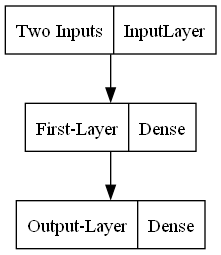

In [42]:
random.seed(13990508)
# Define target.
y = data['Inflation'].iloc[1:]

# Define features.
X = data[['Inflation', 'Unemployment']].iloc[:-1]

# Create train and test sets.
y_train, y_test = y.iloc[:400], y.iloc[400:]
X_train, X_test = X.iloc[:400], X.iloc[400:]

# Define sequential model.
model = tf.keras.models.Sequential(name="Task_4_a")

# Add input layer.
model.add(tf.keras.Input(shape=(2,),name = "Two Inputs"))

# Define dense layer.
model.add(tf.keras.layers.Dense(2, activation="relu", name = "First-Layer" ))

# Define output layer.
model.add(tf.keras.layers.Dense(1, activation="linear",name = "Output-Layer"))

# Compile the model.
model.compile(loss="mse", optimizer= tf.keras.optimizers.Adam())

# Train the model.
model.fit(X_train, y_train, epochs=100,verbose=0)


# Print model architecture.
print(model.summary())

# Evaluate training set using MSE.
MSE_train_a = model.evaluate(X_train, y_train)

# Evaluate test set using MSE.
MSE_test_a = model.evaluate(X_test, y_test)

print("MSE for training set: {}, MSE for test set: {}".format(MSE_train_a,MSE_test_a))

# Print model architecture.
tf.keras.utils.plot_model(model)


### (b) Add more features
Here I will use all the possible data to train the model and evaluate the results

Model: "Task_4_b"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First-Layer (Dense)         (None, 5)                 30        
                                                                 
 Output-Layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 36 (144.00 Byte)
Trainable params: 36 (144.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
8/8 [==============================] - 0s 719us/step - loss: 0.1323
MSE for training set: 0.06658747047185898, MSE for test set: 0.13232964277267456
The MSE for the training set has change -0.012661866843700409 from the part (a) 
The MSE for the test set has change -0.011189326643943787 from the part (a)


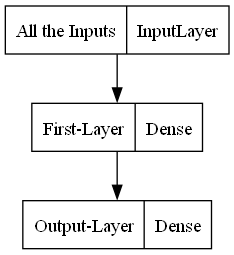

In [43]:
random.seed(13990508)
# Define target.
y = data['Inflation'].iloc[1:]

# Define features.
columns = list(data)
X = data[columns].iloc[:-1]

# Create train and test sets.
y_train, y_test = y.iloc[:400], y.iloc[400:]
X_train, X_test = X.iloc[:400], X.iloc[400:]

# Define sequential model.
model = tf.keras.models.Sequential(name="Task_4_b")

# Add input layer.
model.add(tf.keras.Input(shape=(len(columns),),name = "All the Inputs"))

# Define dense layer.
model.add(tf.keras.layers.Dense(len(columns), activation="relu", name = "First-Layer" ))

# Define output layer.
model.add(tf.keras.layers.Dense(1, activation="linear",name = "Output-Layer"))

# Compile the model.
model.compile(loss="mse", optimizer= tf.keras.optimizers.Adam())

# Train the model.
model.fit(X_train, y_train, epochs=100,verbose=0)


# Print model architecture.
print(model.summary())
# Evaluate training set using MSE.
MSE_train_b = model.evaluate(X_train, y_train)

# Evaluate test set using MSE.
MSE_test_b = model.evaluate(X_test, y_test)

print("MSE for training set: {}, MSE for test set: {}".format(MSE_train_b,MSE_test_b))
print("The MSE for the training set has change {} from the part (a) ".format(MSE_train_b-MSE_train_a))
print("The MSE for the test set has change {} from the part (a)".format(MSE_test_b-MSE_test_a))

# Print model architecture.
tf.keras.utils.plot_model(model)


As you can see the MSE is lower for both the training and test set. This is because we have more features to train on and so the model is able to learn more about the data.

### (c) Adding another hidden layer

Model: "Task_4_c"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First-Layer (Dense)         (None, 2)                 6         
                                                                 
 Second-Layer (Dense)        (None, 2)                 6         
                                                                 
 Output-Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
8/8 [==============================] - 0s 1ms/step - loss: 0.1225
MSE for training set: 0.08730211108922958, MSE for test set: 0.12248902767896652
The MSE for the training set has change 0.008052773773670197 from the part (a) 
The MSE for the test set has change -0.02102994173765182

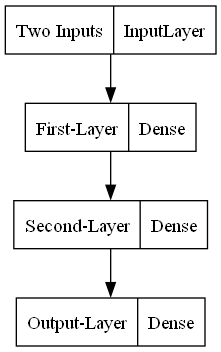

In [45]:
random.seed(13990508)
# Define target.
y = data['Inflation'].iloc[1:]

# Define features.
X = data[['Inflation', 'Unemployment']].iloc[:-1]

# Create train and test sets.
y_train, y_test = y.iloc[:400], y.iloc[400:]
X_train, X_test = X.iloc[:400], X.iloc[400:]

# Define sequential model.
model = tf.keras.models.Sequential(name="Task_4_c")

# Add input layer.
model.add(tf.keras.Input(shape=(2,),name = "Two Inputs"))

# Define dense layer.
model.add(tf.keras.layers.Dense(2, activation="relu", name = "First-Layer" ))

# Add hidden layer.
model.add(tf.keras.layers.Dense(2, activation="relu", name = "Second-Layer" ))


# Define output layer.
model.add(tf.keras.layers.Dense(1, activation="linear",name = "Output-Layer"))

# Compile the model.
model.compile(loss="mse", optimizer= tf.keras.optimizers.Adam())

# Train the model.
model.fit(X_train, y_train, epochs=100,verbose=0)


# Print model architecture.
print(model.summary())

# Evaluate training set using MSE.
MSE_train_c = model.evaluate(X_train, y_train)

# Evaluate test set using MSE.
MSE_test_c = model.evaluate(X_test, y_test)

print("MSE for training set: {}, MSE for test set: {}".format(MSE_train_c,MSE_test_c))
print("The MSE for the training set has change {} from the part (a) ".format(MSE_train_c-MSE_train_a))
print("The MSE for the test set has change {} from the part (a)".format(MSE_test_c-MSE_test_a))

tf.keras.utils.plot_model(model)


As we can see the MSE for the training set is higher from the part (a) and the MSE for the test set is lower from the part (a). This means that the model is overfitting the training set and it is not generalizing well to the test set.

### (d) Change Hyperparameter
Here I will change the number of epochs to 200 and learning rate 0.01.

Model: "Task_4_d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First-Layer (Dense)         (None, 2)                 6         
                                                                 
 Output-Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
8/8 [==============================] - 0s 728us/step - loss: 0.1378
MSE for training set: 0.06606683135032654, MSE for test set: 0.13776244223117828
The MSE for the training set has change -0.013182505965232849 from the part (a) 
The MSE for the test set has change -0.0057565271854400635 from the part (a)


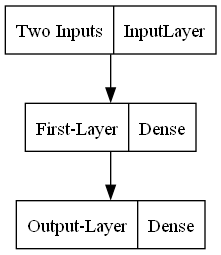

In [48]:
random.seed(13990508)
# Define target.
y = data['Inflation'].iloc[1:]

# Define features.
X = data[['Inflation', 'Unemployment']].iloc[:-1]

# Create train and test sets.
y_train, y_test = y.iloc[:400], y.iloc[400:]
X_train, X_test = X.iloc[:400], X.iloc[400:]

# Define sequential model.
model = tf.keras.models.Sequential(name="Task_4_d")

# Add input layer.
model.add(tf.keras.Input(shape=(2,),name = "Two Inputs"))

# Define dense layer.
model.add(tf.keras.layers.Dense(2, activation="relu", name = "First-Layer" ))

# Define output layer.
model.add(tf.keras.layers.Dense(1, activation="linear",name = "Output-Layer"))

# Compile the model.
model.compile(loss="mse", optimizer= tf.keras.optimizers.Adam(learning_rate=0.01))

# Train the model.
model.fit(X_train, y_train, epochs=200,verbose=0)


# Print model architecture.
print(model.summary())

# Evaluate training set using MSE.
MSE_train_d = model.evaluate(X_train, y_train)

# Evaluate test set using MSE.
MSE_test_d = model.evaluate(X_test, y_test)

print("MSE for training set: {}, MSE for test set: {}".format(MSE_train_d,MSE_test_d))
print("The MSE for the training set has change {} from the part (a) ".format(MSE_train_d-MSE_train_a))
print("The MSE for the test set has change {} from the part (a)".format(MSE_test_d-MSE_test_a))

# Print model architecture.
tf.keras.utils.plot_model(model)


As you can see th MSE for both the training and test set has decreased from the part (a) to part (d). This is because we have increased the learning rate from 0.001 to 0.01 and the number of epochs from 100 to 200. This has allowed the model to learn more from the data and therefore decrease the MSE.

### (e)


## **Task 5**

In [86]:
# Load packages.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, confusion_matrix
# Load data.
file_path = 'https://www.dropbox.com/scl/fi/7d1orgbpbi6ug2c0u3e6w/crisis.csv?rlkey=itacct9ifoo7s672h3stp7ycv&dl=1'
data = pd.read_csv(file_path)

# Define features.
X = data[['stir', 'debtgdp', 'inflation', 'stock_price_growth']].copy()

# Define target.
y = data['crisisJST'].copy()

# Generate training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=103)

def fit_the_model(param_set):
    # Instantiate gradient boosting model.
    gbt_model = GradientBoostingClassifier(**param_set, random_state=103)
    # Train gradient boosting model.
    gbt_model.fit(X_train, y_train)
    return gbt_model

# Define function to evaluate trained model.
def evaluate_model(model, X_sample, y_sample,set_name):
    # Generate predictions.
    y_pred = model.predict(X_sample)

    # Compute accuracy.
    accuracy = accuracy_score(y_sample, y_pred)

    # Generate confusion matrix.
    conf_matrix = confusion_matrix(y_sample, y_pred)

    # Print accuracy.
    print("Gradient Boosting Classifier - Accuracy:", accuracy)

    # Plot confusion matrix.
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix for {}'.format(set_name))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Gradient Boosting Classifier - Accuracy: 1.0


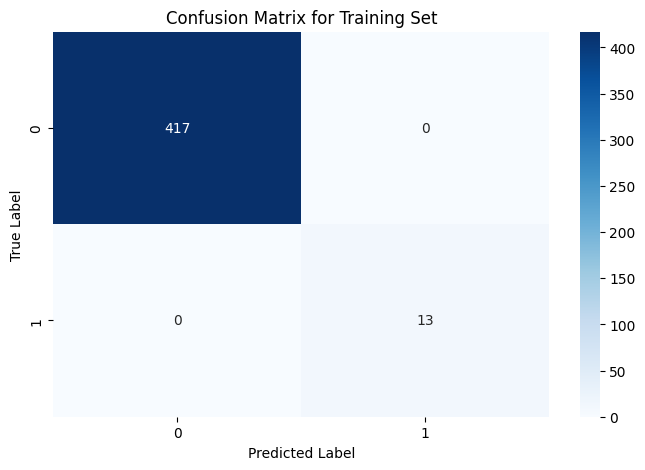

Gradient Boosting Classifier - Accuracy: 0.9616724738675958


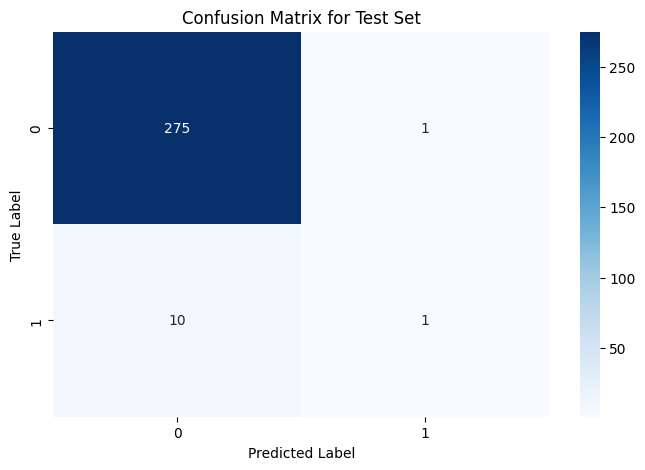

In [87]:
# Set hyperparameters.
param_set = {'n_estimators': 100, 'learning_rate': 0.10, 'max_depth': 3}
gbt_model = fit_the_model(param_set)

# Evaluate model on training data.

evaluate_model(gbt_model, X_train, y_train,"Training Set")
# Evaluate model on test data.
evaluate_model(gbt_model, X_test, y_test,"Test Set")

### (a)
As you can see in the figures, the model is overfitting the training set. The accuracy of the model on the training set is 1, and the accuracy on the test set is 0.96. This is a clear sign of overfitting. The model is not able to generalize well to unseen data. The main reason for this problem is the simple data set. In the training set, we do not have that many observations for the crisis period. Therefore, the model is not able to learn the patterns in the data. 

### (b)
In the test set, the model predict correctly for 275 values and only 1 value was predicted as a crisis when it was not. On the other hand, the model predicted 10 values as not a crisis when it was a crisis and 1 value as a crisis when it was. This feature is not good at predicting crisis because it has a lot of false negatives and false positives. The model has a good accuracy because the data is **unbalanced**. The model is predicting the majority class (not a crisis) and it is not predicting the minority class (crisis). 

### (c)
Yes, of course, the model is overfitting. The accuracy of the training set is 1, while the accuracy of the test set is 0.95. If we calculate the accuracy of the test set for different clusters, then we have 99% accuracy for the non-crisis cluster and 9% accuracy for the crisis cluster. While the accuracy of the training set is 100% for both clusters. This is a clear sign of overfitting. 

### (d) Change the model
As we can see the model is overfitting the training set, so we need to tune the hyperparameters. I am going to use the grid search method to find the best hyperparameters.

In [88]:
# import grid search
from sklearn.model_selection import GridSearchCV

# Set hyperparameters.
param_set = {'n_estimators': 100, 'learning_rate': 0.10, 'max_depth': 3}

# Set grid search parameters.
param_set_grid = {
    'n_estimators': [25, 50, 75, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.05, 0.10, 0.15],
    'max_depth': [1, 2, 3, 4, 5],
    'validation_fraction' : [0.1,0.2,0.3,0.4,0.5]

}

# Instantiate gradient boosting model.
gbt_model = GradientBoostingClassifier(**param_set, random_state=103)

grid_dt = GridSearchCV(estimator=gbt_model,param_grid=param_set_grid,cv=10,verbose=1,n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Print best hyperparameters.
print(grid_dt.best_params_)
# Print best accuracy.
print(grid_dt.best_score_)


Fitting 10 folds for each of 750 candidates, totalling 7500 fits
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'validation_fraction': 0.1}
0.9744186046511627


Gradient Boosting Classifier - Accuracy: 1.0


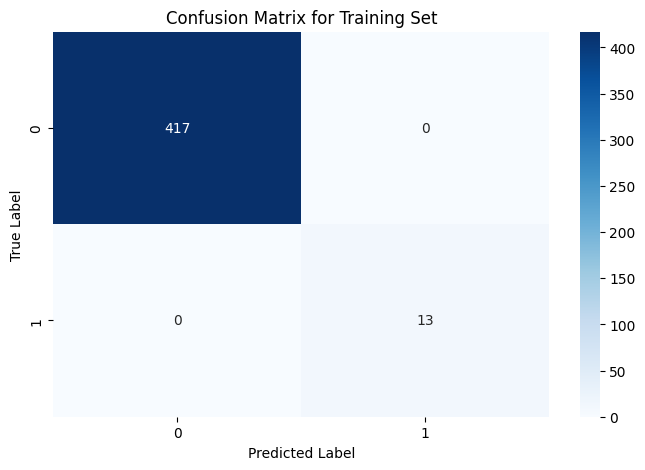

Gradient Boosting Classifier - Accuracy: 0.9581881533101045


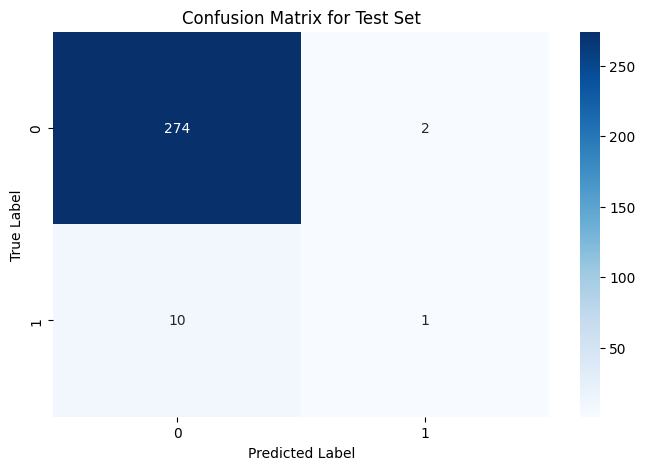

In [90]:
gbt_model = GradientBoostingClassifier(**grid_dt.best_params_, random_state=103)
gbt_model.fit(X_train, y_train)
evaluate_model(gbt_model, X_train, y_train,"Training Set")
# Evaluate model on test data.
evaluate_model(gbt_model, X_test, y_test,"Test Set")

But As you can see, due to the fact that the main problem is the input data, the grid search does not improve the model. I am trying to change the training set.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=103)

In [94]:
columns = ['stir', 'debtgdp', 'inflation', 'stock_price_growth']
X_crisis = data[data.crisisJST == 1][columns]
y_crisis = data[data.crisisJST == 1]['crisisJST']
X_no_crisis = data[data.crisisJST == 0][columns]
y_no_crisis = data[data.crisisJST == 0]['crisisJST']

# Generate training and test sets for crisis.
X_train_crisis, X_test_crisis, y_train_crisis, y_test_crisis = train_test_split(X_crisis,y_crisis,test_size=0.4,random_state=103)

# Generate training and test sets for no crisis.
X_train_no_crisis, X_test_no_crisis, y_train_no_crisis, y_test_no_crisis = train_test_split(X_no_crisis,y_no_crisis,test_size=0.4,random_state=103)

# Generate training and test sets.
X_train_new = pd.concat([X_train_crisis,X_train_no_crisis])
y_train_new = pd.concat([y_train_crisis,y_train_no_crisis])
X_test_new = pd.concat([X_test_crisis,X_test_no_crisis])
y_test_new = pd.concat([y_test_crisis,y_test_no_crisis])

Gradient Boosting Classifier - Accuracy: 0.9836829836829837


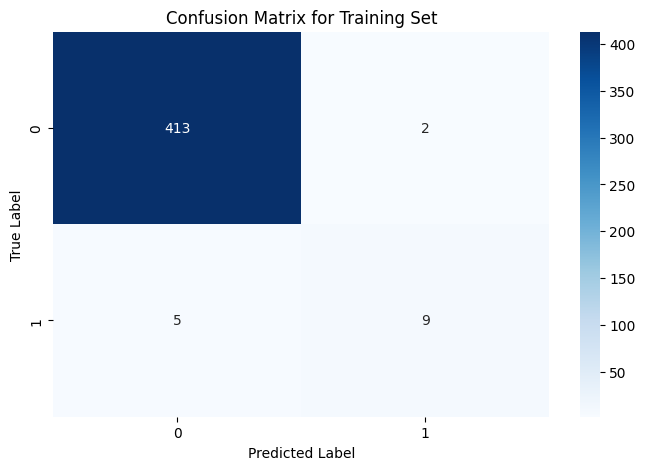

Gradient Boosting Classifier - Accuracy: 0.9826388888888888


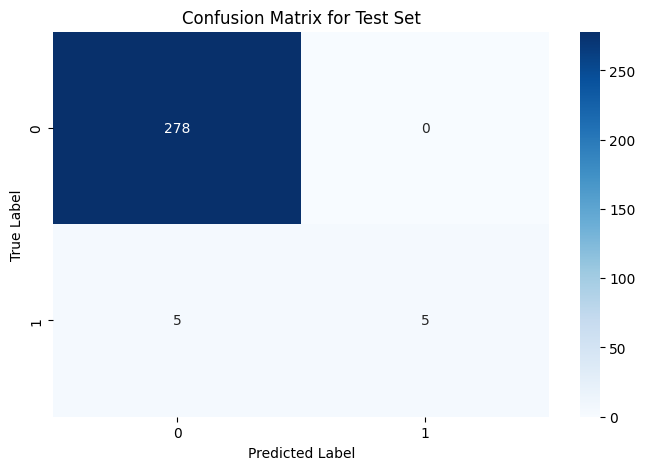

In [97]:
gbt_model = fit_the_model(grid_dt.best_params_)

# Evaluate model on training data.

evaluate_model(gbt_model, X_train_new, y_train_new,"Training Set")
# Evaluate model on test data.
evaluate_model(gbt_model, X_test_new, y_test_new,"Test Set")

Still we have the problem, that's best I can do.

## **Task 1**

### (a)
A typical approach involves running the k-means algorithm multiple times, each time with different randomly initialized cluster centroids ($\mu_j$). From the various clustering results obtained, select the one that yields the minimum distortion $J(c, \mu_j)$ where $J(c, \mu_j)$ is:
$$
J(c,\mu_j) = \sum_{i=1}^{n} || x^{(i)} - \mu_{c}(i) ||^2
$$


### (b)
PCA and PLS have different objectives and applications. PCA simplifies data by identifying orthogonal axes that capture maximum variance, while PLS finds latent variables that maximize covariance between predictor variables and a target variable. PCA is unsupervised and used for dimensionality reduction, while PLS is supervised and preferred for predictive modeling with high-dimensional datasets. The key difference is that PLS incorporates information about the relationship with the target variable, making it a powerful tool for regression tasks.

## **Task 7**

### (a)
This approach introduce a penalty term to the traditional least squares objective function, aiming to shrink or eliminate some of the coefficients, effectively performing variable selection and reducing the number of predictors. The objective function is:
$$
\sum_{i=1}^{n}(y_i + \beta_0 - \sum_{j=1}^p \beta_jX_{ij})^2 + \lambda f(\beta)
$$
Regularized regression methods can help recover meaningful model parameters even when $p >n $ by providing a way to handle the high-dimensional feature space and avoid overfitting.


### (b)

- OLS:
$$
RSS = \sum_{i=1}^{n}(y_i + \beta_0 - \sum_{j=1}^p \beta_jX_{ij})^2 
$$
- Ridge:
$$
\sum_{i=1}^{n}(y_i + \beta_0 - \sum_{j=1}^p \beta_jX_{ij})^2  + \lambda \sum_{j=1}^p \beta_j^2 = RSS + \lambda \sum_{j=1}^p \beta_j^2
$$
As you can see, OLS do not have the penalty for the coefficients, and in Ridge we use the sum of square of the coefficients rather than the absolute values.

Using this feature of Lasso, caring about the sum of absolute values, we can set some coefficients exactly zero. This can lead to feature selection, that some predictors are entirely excluded from the model.

### (c)
To address this issue, cross-validation offers a straightforward solution. We select a range of $\lambda$ values and calculate the cross-validation error for each $\lambda$. The tuning parameter value is then chosen based on the smallest cross-validation error. Subsequently, the model is refitted using all observations, utilizing the selected tuning parameter value.

## **Task 8**
In part a, describe the types of features you want to measure in the text without discussing the methods you would use to extract them. 

In part b, list the methods you would use to extract each of the features. 

And in part c, explain how the features produced by the methods given in part b are represented numerically (e.g. as embedding vectors, word counts, etc.).

### (a)
- Text classification
-  Sentiment 
-


### (b)
-
-
-

### (c)
-
-
-

### (d)